In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def plot_predictions(
    train_data,
    train_labels,
    test_data,
    test_labels,
    predictions
):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c = "b", label = "Traning data")
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend()

In [ ]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, y_pred)

In [6]:
insurance = pd.read_csv('insurance.csv')

In [9]:
# age, sex, bmi, childern, smoker, region : feature
# charges : label

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
import sweetviz as sv

my_report = sv.analyze(insurance)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# sex, smoker, region은 분류형(categorical) => numerical variable로 바꿔야 함
# one-hot encoding 
insurance_one_hot = pd.get_dummies(insurance)

In [14]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [15]:
# feature(x), label(y)로 insurance_one_hot 분리
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
type(X), type(y) # 떼어낸 것들은 series로 타입 변경됨

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [19]:
# dataset에서 feature 와 label 구분
# 이제 training dataset과 test dataset으로 구분(split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [21]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. 모델을 fit
insurance_model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [22]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 4ms/step - loss: 8628.2520 - mae: 8628.2520


[8628.251953125, 8628.251953125]

In [23]:
# 모델이 좋지 않음
# 1. layer 늘려볼까
# 2. layer의 neuron을 늘려볼까
# 3. optimizer를 바꿔볼까

In [26]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. 모델을 fit
history = insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [27]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [29]:
type(history.history)

dict

Text(0.5, 0, 'epochs')

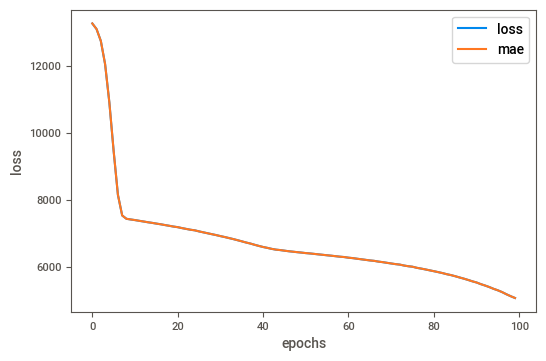

In [30]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [31]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 4989.6201 - mae: 4989.6201
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 4915.0635 - mae: 4915.0635
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 4841.5186 - mae: 4841.5186
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 4761.9346 - mae: 4761.9346
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 4682.8105 - mae: 4682.8105
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 4606.6265 - mae: 4606.6265
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 4510.3018 - mae: 4510.3018
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 4421.1680 - mae: 4421.1680
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 4349.3481 - mae: 4349.3481
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 4256.1733 - mae: 4256.1733

In [32]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3495.8057 - mae: 3495.8057


[3495.8056640625, 3495.8056640625]

Text(0.5, 0, 'epochs')

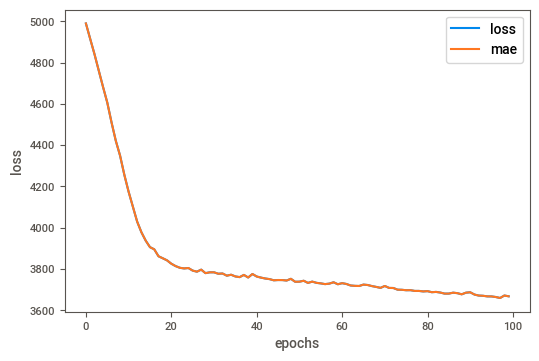

In [34]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [36]:
history_3 = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 3657.6953 - mae: 3657.6953
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 3651.6064 - mae: 3651.6064
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 3654.1047 - mae: 3654.1047
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 3654.4329 - mae: 3654.4329
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 3653.3511 - mae: 3653.3511
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3660.8716 - mae: 3660.8716
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 3651.4697 - mae: 3651.4697
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3648.3267 - mae: 3648.3267
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3644.4326 - mae: 3644.4326
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3653.6536 - mae: 3653.6536

In [37]:
# Preprocessing data (normalization 그리고 standadization)
# 기본 concept : 신경망(neural network)에 전달하는 data의 값을 0 ~ 1사이로 맞춰줌
# normalization : 원래 값들의 범위를 0~1 사이로 조정
# standardizatoin : 데이터를 평균이 0인 상태에서 분산으로 조정
# Comuter vision의 경우 : pixel의 값들이 일반적으로 0~255의 값을 가짐 / pixel_value /255.

In [38]:
# 1. 처리할 데이터를 숫자로 바꾸어주는 효과 (신경망은 문자열을 다룰 수 없다)
# 2. 우리가 처리할 데이터가 적절한 형태를 가지고 있다는 것을 확인하는 과정(input shape, output shape)
# 3. feature scaling 해주는 과정
#    - normalization => min-max 간의 관계 조정
#    - standardization => 평균이 0, 분산이 1인 상태 기준으로 조정
#    일반적으로 신경망에서 normalization을 더 많이 사용

In [39]:
insurance = pd.read_csv('insurance.csv')

In [40]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [44]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # 현재 숫자로 되어있는 값들을 0~1사이로 조정하겠다
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [45]:
type(ct)

sklearn.compose._column_transformer.ColumnTransformer

In [46]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [49]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [50]:
type(X_train_normal), X_train_normal

(numpy.ndarray,
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]))

In [51]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [52]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [54]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [55]:
# 이제 데이터를 가지고 와서 training set과 test set으로 나누고, normalization까지 완료

In [57]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. 모델을 fit
history = insurance_model_3.fit(X_train_normal, y_train, epochs = 200, verbose = 0)

In [58]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]